In [1]:
# Import libraries  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#To turn off warning messages.
import warnings
warnings.simplefilter("ignore")

In [2]:
#Import iris dataset
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Names'] 
data=pd.read_csv('/kaggle/input/iris/Iris.csv',names=columns)
data.head()

,Sepal length,Sepal width,Petal length,Petal width,Names
Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


In [3]:
data = data.iloc[1: , :]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sepal length  150 non-null    object
 1   Sepal width   150 non-null    object
 2   Petal length  150 non-null    object
 3   Petal width   150 non-null    object
 4   Names         150 non-null    object
dtypes: object(5)
memory usage: 7.0+ KB


In [5]:
data['Sepal length'] = data['Sepal length'].astype(float)
data['Sepal width'] = data['Sepal width'].astype(float)
data['Petal length'] = data['Petal length'].astype(float)
data['Petal width'] = data['Petal width'].astype(float)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  150 non-null    float64
 1   Sepal width   150 non-null    float64
 2   Petal length  150 non-null    float64
 3   Petal width   150 non-null    float64
 4   Names         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
Petal length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
Petal width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [8]:
#EDA
data.isnull().sum()

Sepal length    0
Sepal width     0
Petal length    0
Petal width     0
Names           0
dtype: int64

In [9]:
data['Names'].value_counts()

Names
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

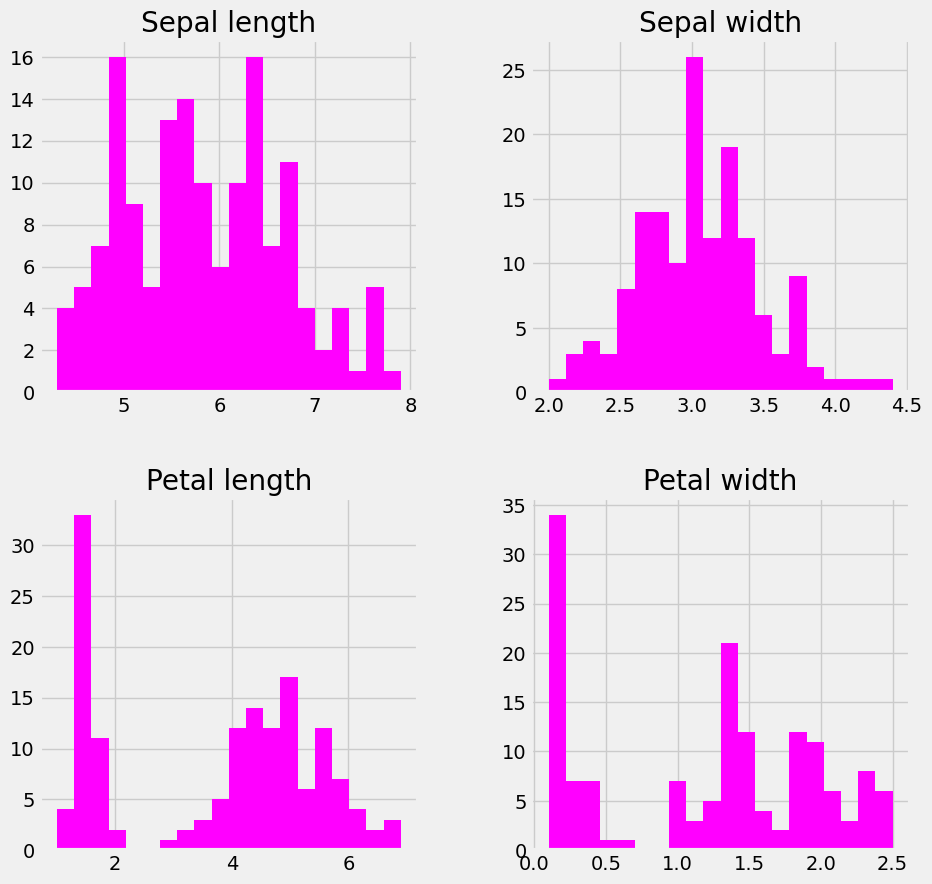

In [10]:
plt.style.use('fivethirtyeight')
data.hist(bins=20, figsize=(10, 10),color='magenta')
plt.show()

In [11]:
#Devide data
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [12]:
#Splitting the data into the training and testing set  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10) 

In [13]:
#Build and fit the model using logisticRegression 
reg = LogisticRegression(random_state = 0)
reg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [14]:
#Predict flower name
y_pred=reg.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [15]:
cm = confusion_matrix(y_test, y_pred)
print("Confution matrix: \n",cm)
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Confution matrix: 
 [[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]
Accuracy of the model is 100.00


In [16]:
cr = classification_report(y_test, y_pred)
print("classification_report: \n ",cr) 

classification_report: 
                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         7

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



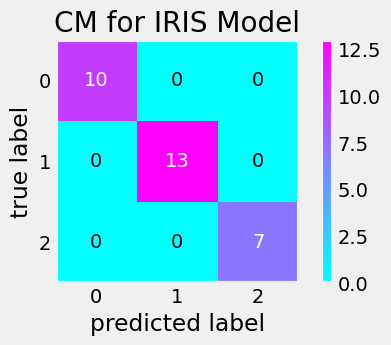

In [17]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                colorbar=True,
                                cmap='cool',
                               figsize=(5, 3))
plt.title("CM for IRIS Model")
plt.show()

In [18]:
X_test['predictions'] = y_pred 

In [19]:
X_test.head()

,Sepal length,Sepal width,Petal length,Petal width,predictions
88,6.3,2.3,4.4,1.3,Iris-versicolor
112,6.4,2.7,5.3,1.9,Iris-virginica
11,5.4,3.7,1.5,0.2,Iris-setosa
92,6.1,3.0,4.6,1.4,Iris-versicolor
50,5.0,3.3,1.4,0.2,Iris-setosa
